In [1]:
##white wine

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import scipy.stats as st
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import missingno as msno
from sklearn import preprocessing
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score, classification_report


In [99]:
df = pd.read_csv('winequality-white.csv', sep=';')

In [100]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 2414 to 3802
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


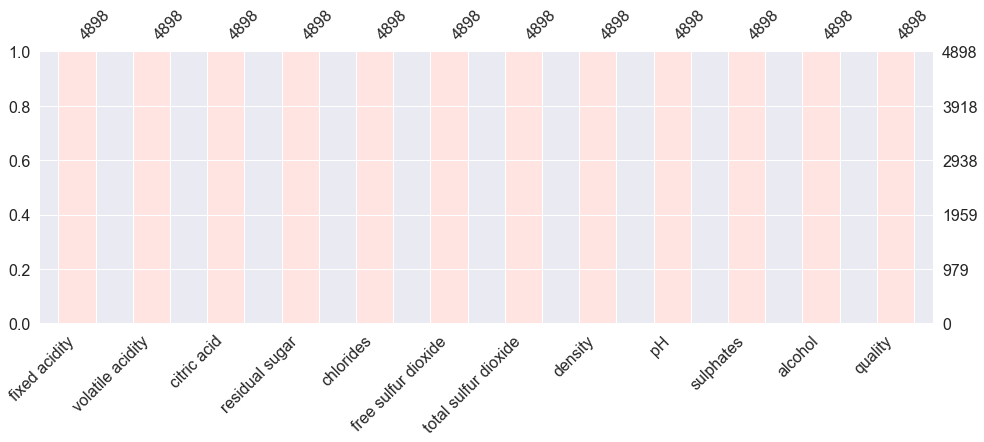

In [101]:
msno.bar(df, figsize = (16,5),color = "#FFE4E1")
plt.show()

In [55]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        6.861538          0.278777     0.333477        6.417480   
std         0.862510          0.097945     0.118564        5.070478   
min         4.200000          0.085000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.310000        5.200000   
75%         7.300000          0.320000     0.380000        9.900000   
max        14.200000          0.905000     1.660000       31.600000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.045828            35.142902            138.290494     0.993983   
std       0.023181            16.282099             41.747077     0.002985   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.035000            23.250000            109.000000     0.991680   
50%       0.043000            34.000000            134.000000     0.993700   
75%       0.050000            45.000000            166.500000     0.996100   
max       0.301000           131.000000            366.500000     1.010300   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.193777     0.485310    10.575130     5.897436  
std       0.150025     0.113771     1.260334     0.866271  
min       2.720000     0.220000     8.400000     3.000000  
25%       3.090000     0.400000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.290000     0.540000    11.425000     6.000000  
max       3.820000     1.060000    14.000000     8.000000

In [102]:
df.duplicated().value_counts()

False    3961
True      937
dtype: int64

In [57]:
df.drop_duplicates(keep='first', inplace=True)

In [103]:
df.duplicated().value_counts()

False    3961
True      937
dtype: int64

In [104]:
columns=df.columns


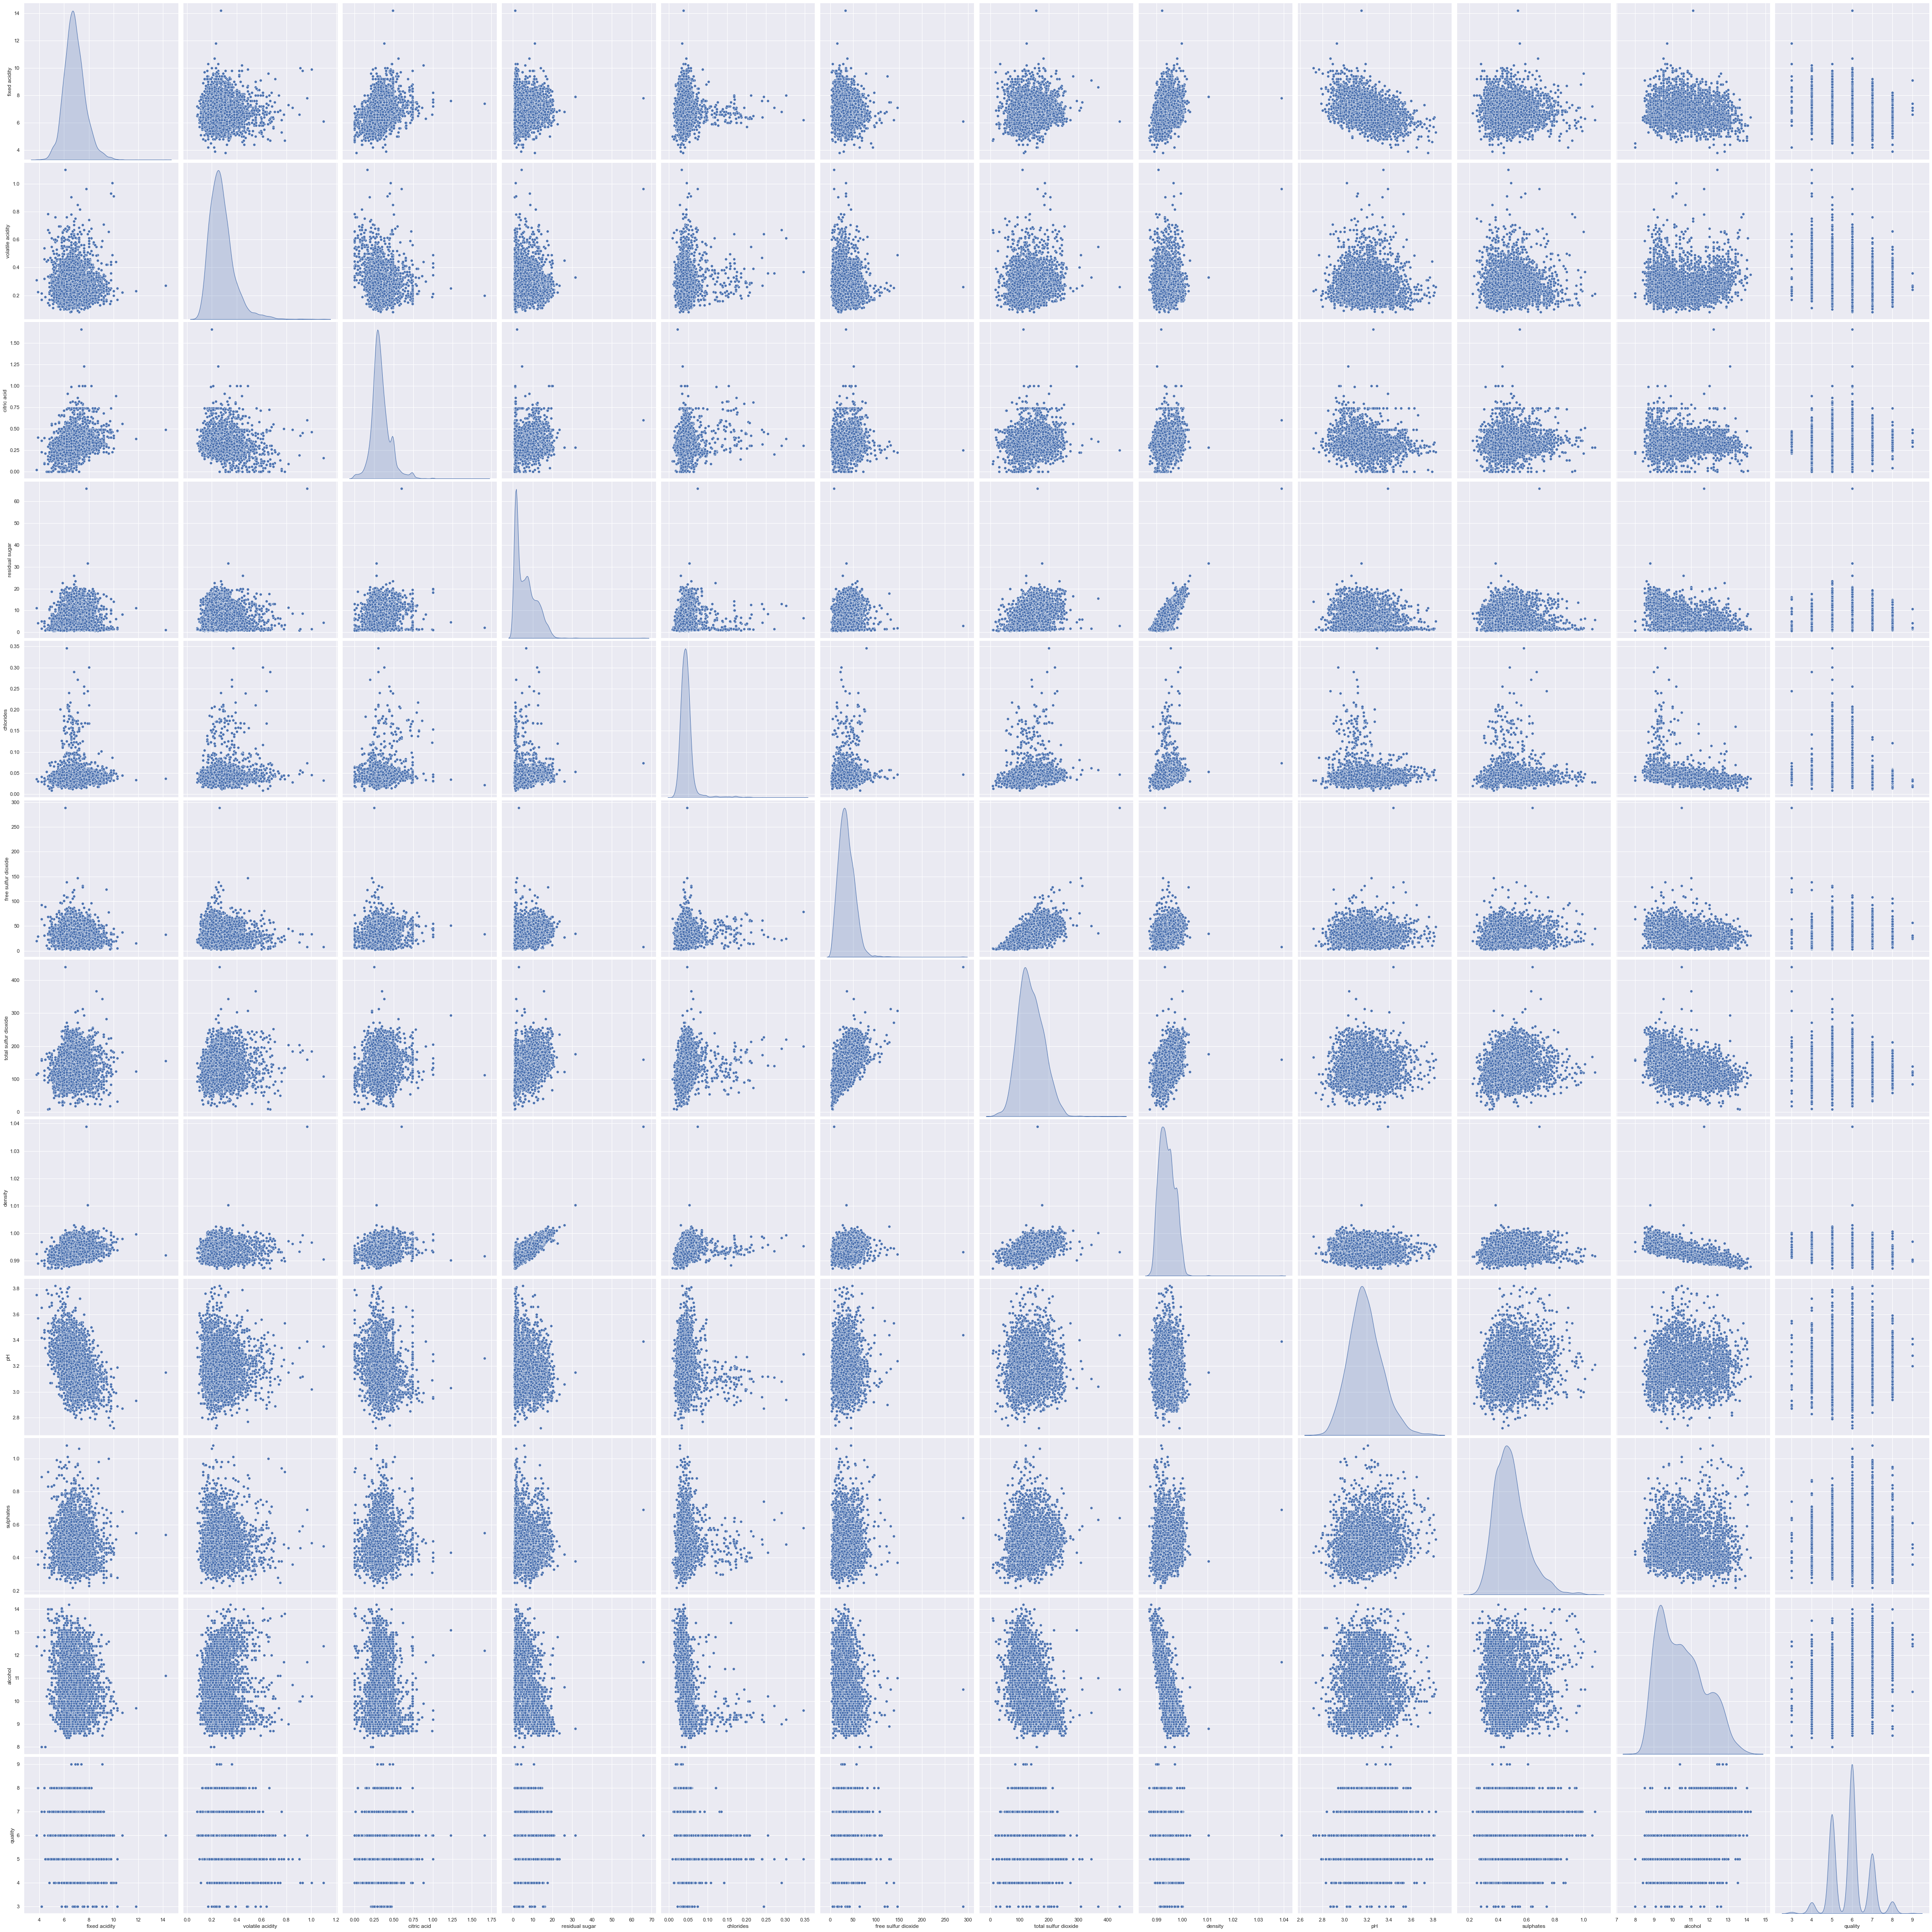

In [105]:
sns.set()
sns.pairplot(df[columns],height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

In [61]:
fig = go.Figure(data=[go.Pie(labels=df['quality'].value_counts().index, values=df['quality'].value_counts(), hole=.3)])
fig.update_layout(legend_title_text='Quality')
fig.show()

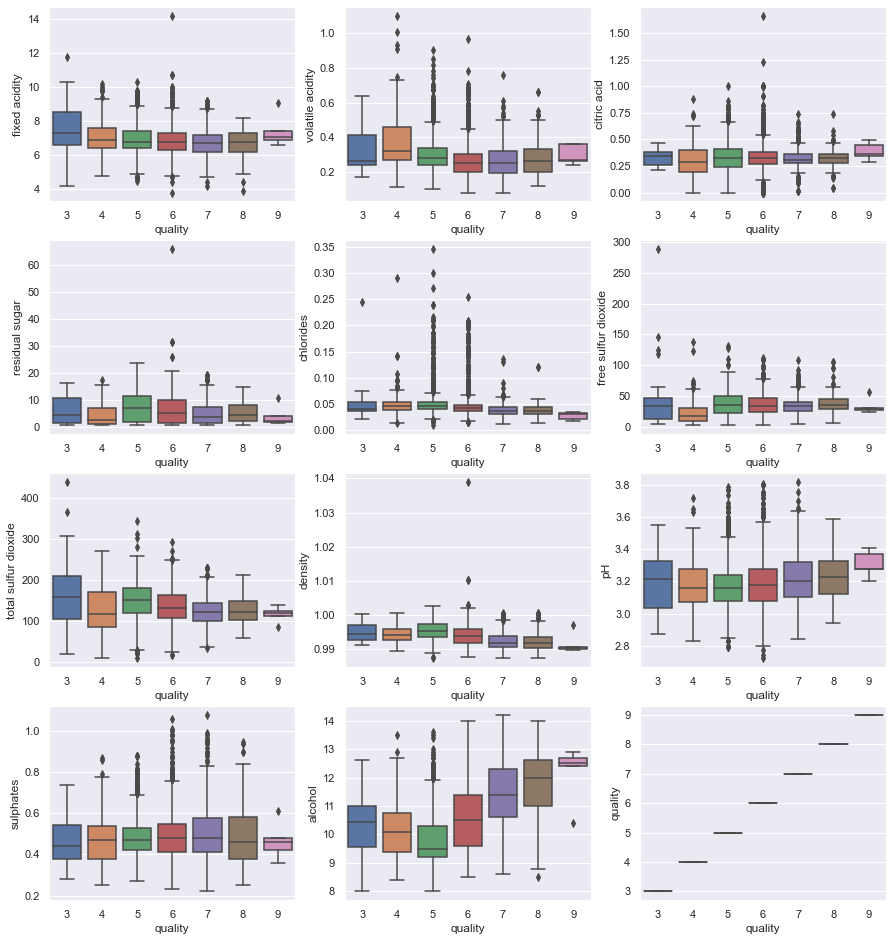

In [106]:
i=1
plt.figure(figsize=(15,25))
for feature in columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=df[feature], x = df['quality'])
    i+=1

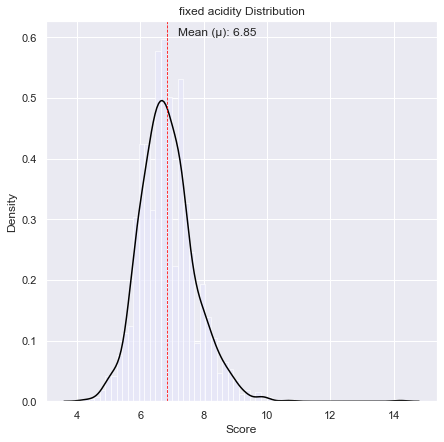

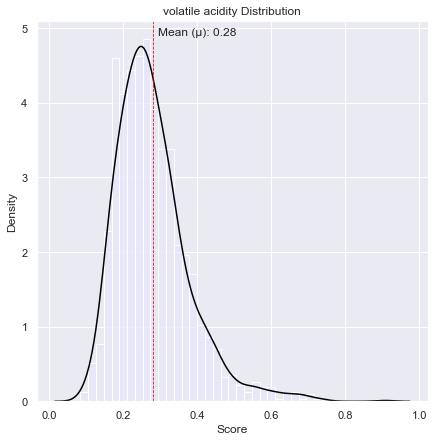

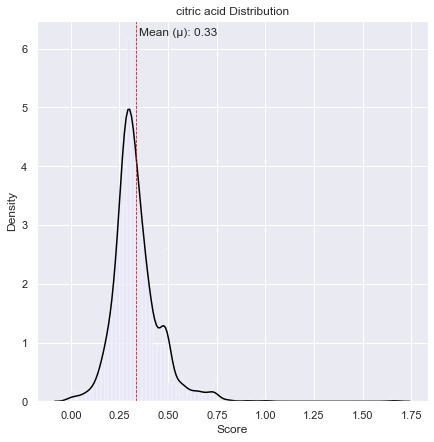

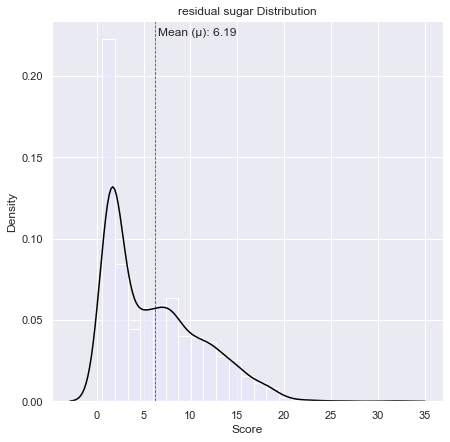

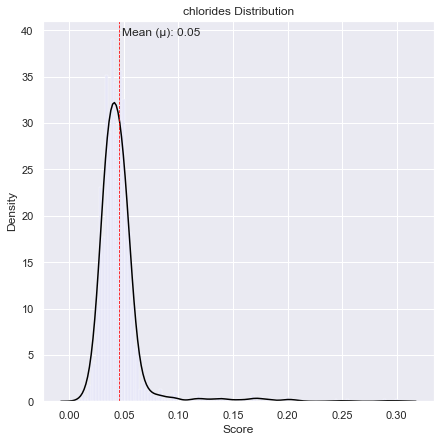

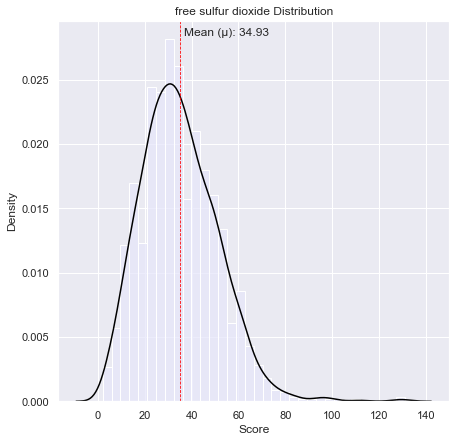

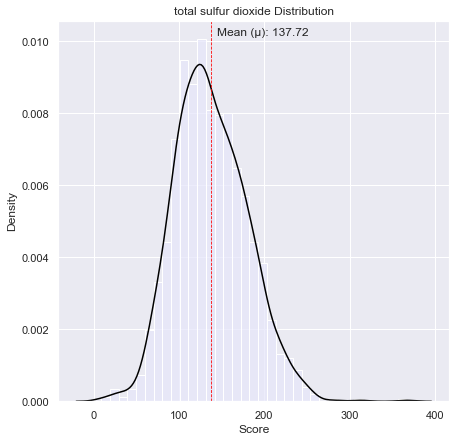

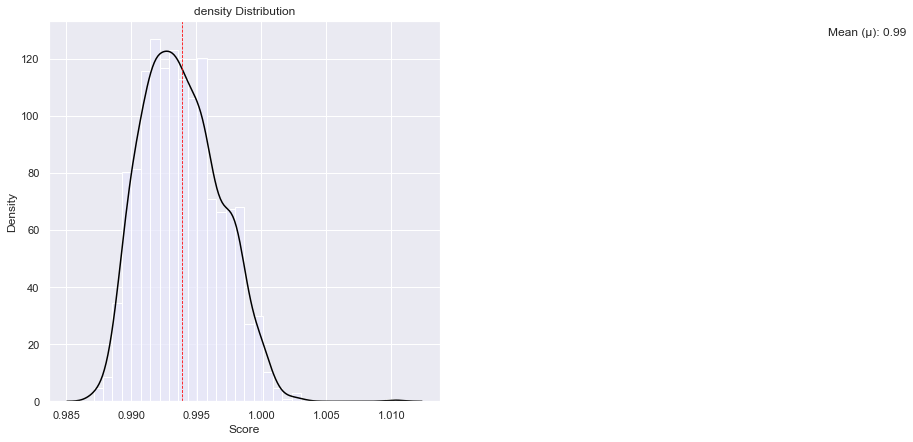

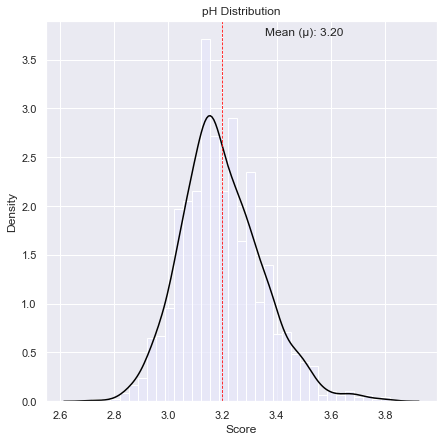

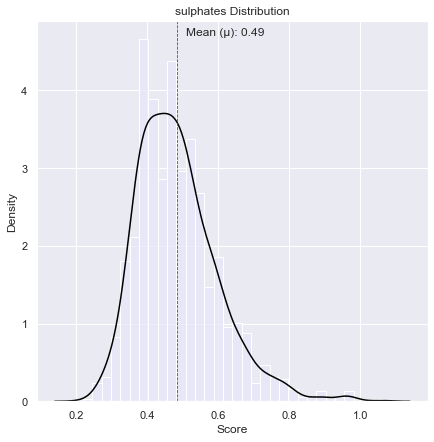

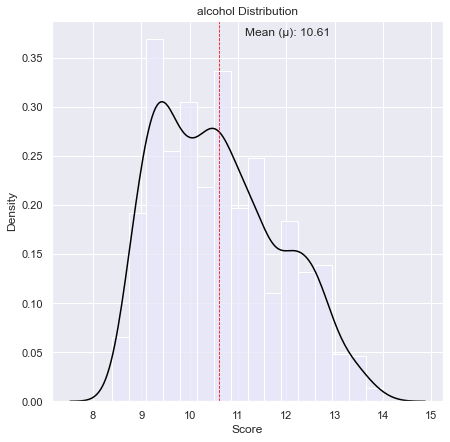

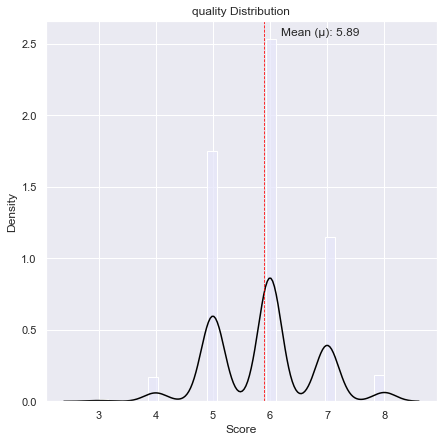

In [63]:
for column_name in df.columns:
  plt.figure(figsize=(7, 7))
  plt.title("{column_name} Distribution".format(column_name = column_name))
  sns.histplot(df[column_name], stat='density',color='#E6E6FA')
  sns.kdeplot(df[column_name], color='black')
  plt.axvline(df[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(df[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(df[column_name].mean()))
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()

In [107]:
correlation = df.corr()
print(correlation['quality'].sort_values(ascending = False),'\n')

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64 



Index(['quality', 'alcohol', 'pH', 'sulphates', 'free sulfur dioxide',
       'citric acid', 'residual sugar', 'fixed acidity',
       'total sulfur dioxide', 'volatile acidity'],
      dtype='object')


<AxesSubplot:>

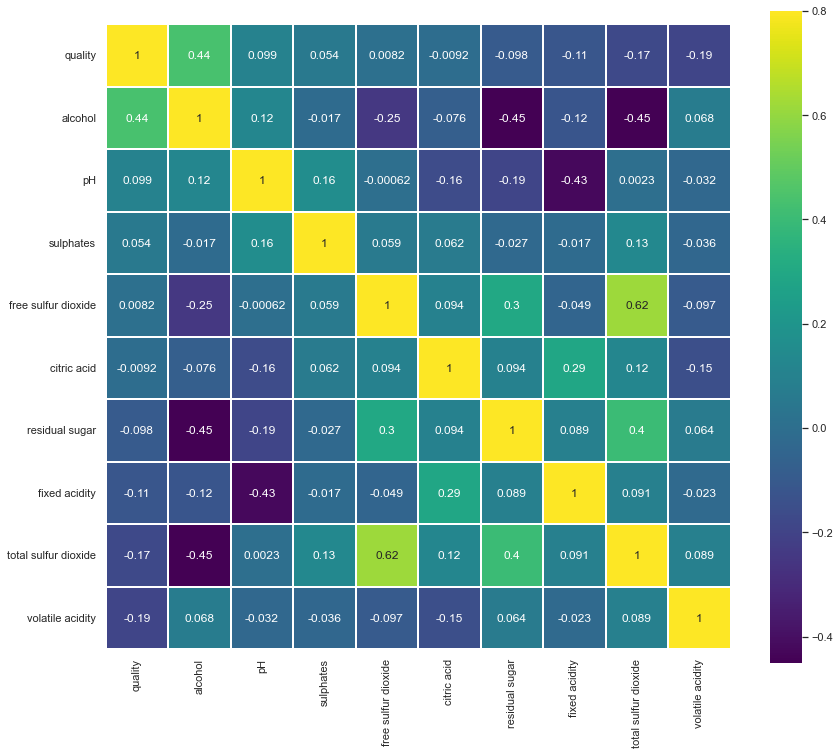

In [108]:
k= 10
cols = correlation.nlargest(k,'quality')['quality'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [66]:
y=df['quality']
df=df.drop(['quality'],axis=1)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [68]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1035, 11) (444, 11) (1035,) (444,)


In [69]:
# Transformar os dados
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [70]:
X_train_std

array([[ 0.27896886,  0.98967112,  0.72799666, ..., -1.03270894,
         0.02655412, -0.49165344],
       [ 1.20180631, -1.60591874,  1.34865279, ..., -0.09833788,
        -0.1530767 , -0.00522202],
       [-0.75922328, -0.30812381,  0.46200117, ...,  0.23536607,
        -0.7817846 ,  0.40013749],
       ...,
       [ 0.04825949,  1.18933187, -1.48863237, ..., -0.76574578,
         0.02655412, -0.97808485],
       [-0.98993264, -0.60761495, -0.77931108, ..., -0.76574578,
        -1.14104625, -0.97808485],
       [-0.41315923, -1.00693647, -0.24732012, ...,  1.97062661,
         0.11636954, -0.32950963]])

In [71]:
X_test_std

array([[ 1.31716099, -0.80727571, -0.33598528, ..., -0.6322642 ,
         1.64323156,  0.96764081],
       [-0.75922328, -1.10676685, -0.5133156 , ...,  1.43670029,
        -0.24289212,  0.15692178],
       [ 0.04825949,  1.18933187,  1.96930892, ..., -0.36530104,
        -0.24289212, -1.54558817],
       ...,
       [ 0.27896886, -0.80727571, -0.60198076, ..., -1.03270894,
        -1.05123083, -0.08629393],
       [ 0.16361418, -0.30812381,  1.96930892, ...,  0.23536607,
         0.38581577,  0.31906559],
       [ 0.6250329 , -1.00693647,  0.19600569, ...,  1.50344108,
        -1.23086166, -1.22130056]])

In [72]:
model_lin = LinearRegression()

In [73]:
# Treinar o modelo
model_lin.fit(X_train_std, y_train)

LinearRegression()

In [74]:
# Gerando as predições
y_pred = model_lin.predict(X_test_std)

In [75]:
y_pred

array([6.55741506, 6.22159667, 5.21476987, 6.5459503 , 6.36823389,
       6.16655153, 4.82188927, 5.94690012, 6.30437044, 5.91738682,
       4.77147254, 5.59275483, 6.48285162, 5.31793764, 5.8192589 ,
       5.58010173, 5.90679205, 5.45496461, 5.77149768, 5.74592924,
       5.66041806, 5.39862677, 5.57874511, 6.25641496, 6.01704135,
       6.64659575, 6.55356018, 5.43893238, 6.08350155, 5.67952124,
       6.30267258, 5.95526757, 5.90644035, 6.32389119, 5.75489454,
       5.87072532, 5.98667468, 5.67736699, 5.10328088, 6.59534658,
       5.53636659, 6.35505745, 6.17957292, 6.84558325, 5.78293224,
       6.45120938, 5.77001304, 5.85188804, 5.37466777, 5.60215692,
       5.54732908, 5.35899785, 5.68683926, 6.79515913, 6.1389706 ,
       6.31865405, 5.80180854, 5.87077453, 5.93054552, 5.68289267,
       5.63371048, 6.34368001, 5.58515025, 5.49427949, 5.53310796,
       5.76239607, 6.62625936, 5.76389274, 6.62283674, 5.9038039 ,
       5.26703129, 5.92065308, 5.49750752, 5.64027647, 6.18764

In [76]:
# Carregando as metricas
from sklearn.metrics import r2_score

In [77]:
# Calculando o R2
R2 = r2_score(y_test, y_pred)

# Mostra o resultado
print("R2 : ", R2)

R2 :  0.28035981104403096


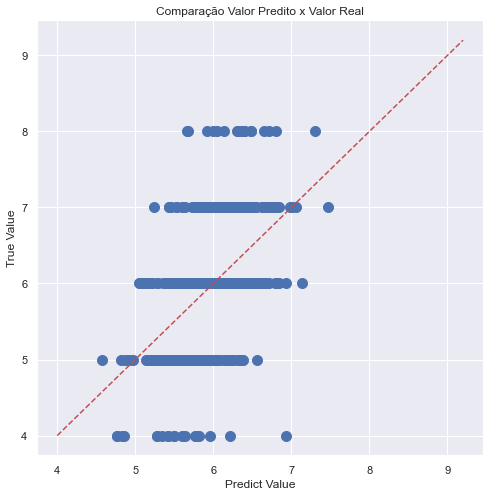

In [79]:
# Vamos criar um gráfico para comparar os Valores Reais com os Preditos
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show()

In [80]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_std, y_train)
y_pred_ridge = ridge.predict(X_test_std)

In [81]:
# Calculando o R2
R2 = r2_score(y_test, y_pred_ridge)

# Mostra o resultado
print("R2 : ", R2)

R2 :  0.2799807611859043


In [82]:
from sklearn.linear_model import Lasso
# Instancia o modelo
lasso = Lasso()

# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
lasso.fit(X_train_std, y_train)

# Para os dados novos, vamos definir a predição para a base de teste
y_pred_lasso = lasso.predict(X_test_std)

In [83]:
# Calculando o R2
R2 = r2_score(y_test, y_pred_lasso)

# Mostra o resultado
print("R2 : ", R2)

R2 :  -5.759943663585787e-06


In [84]:
lasso.coef_

array([-0., -0., -0., -0., -0.,  0., -0., -0.,  0.,  0.,  0.])

In [85]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()


In [86]:
coef_table.insert(len(coef_table.columns),"Coefs",model_lin.coef_.transpose())
coef_table = coef_table.sort_values(by = ['Coefs'], ascending = False)
coef_table

0     Coefs
3         residual sugar  0.403565
10               alcohol  0.167887
8                     pH  0.140579
5    free sulfur dioxide  0.113199
9              sulphates  0.089406
0          fixed acidity  0.089208
2            citric acid  0.027768
4              chlorides  0.003786
6   total sulfur dioxide -0.044495
1       volatile acidity -0.132773
7                density -0.561118

In [88]:
from sklearn.linear_model import ElasticNet

# Instancia o modelo
EN = ElasticNet()

# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
EN.fit(X_train_std, y_train)

# Para os dados novos, vamos definir a predição para a base de teste
y_pred_EN = EN.predict(X_test_std)

In [89]:
# Calculando o R2
R2 = r2_score(y_test, y_pred_EN)

# Mostra o resultado
print("R2 : ", R2)

R2 :  -5.759943663585787e-06


In [ ]:
## Regressão Logística red wines

In [90]:
## transformação para a obtenção da target

y_train_class = np.where(y_train >= 6, 1,0)
y_test_class = np.where(y_test >= 6, 1,0)

In [91]:
#verificando se a classe é balanceada, a fim de se verificar 
# o uso correto da acurácia para avaliaçao do modelo.
pd.DataFrame(y_train_class).value_counts(normalize=True)


1    0.667633
0    0.332367
dtype: float64

In [92]:
# import da Regressão Logistica
from sklearn.linear_model import LogisticRegression

In [93]:
# Instancia o classificador
model = LogisticRegression(max_iter = 1000)

In [94]:
# Treinar o modelo
model.fit(X_train_std, y_train_class)

LogisticRegression(max_iter=1000)

In [95]:
y_pred_class = model.predict(X_test_std)
y_pred_class

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,

In [96]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix


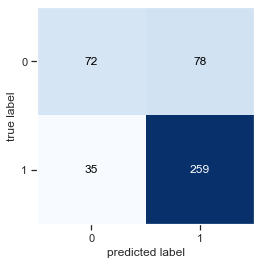

              precision    recall  f1-score   support

           0       0.67      0.48      0.56       150
           1       0.77      0.88      0.82       294

    accuracy                           0.75       444
   macro avg       0.72      0.68      0.69       444
weighted avg       0.74      0.75      0.73       444



In [97]:
cm = confusion_matrix(y_test_class, y_pred_class)
plot_confusion_matrix(cm)
plt.show()

print(classification_report(y_test_class, y_pred_class))

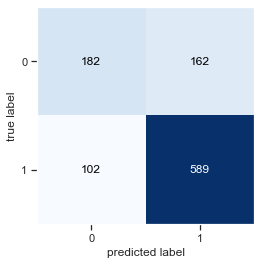

              precision    recall  f1-score   support

           0       0.64      0.53      0.58       344
           1       0.78      0.85      0.82       691

    accuracy                           0.74      1035
   macro avg       0.71      0.69      0.70      1035
weighted avg       0.74      0.74      0.74      1035



In [98]:
cm = confusion_matrix(y_train_class, model.predict(X_train_std))
plot_confusion_matrix(cm)
plt.show()

print(classification_report(y_train_class, model.predict(X_train_std)))